In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
from fastai.text import *

In [3]:
PATH = Path('data/IAM_handwriting')

In [4]:
!ls {PATH}

ascii           line_labels.csv models          tmp             words.csv
forms           lines           sentences       words           words_chars.csv


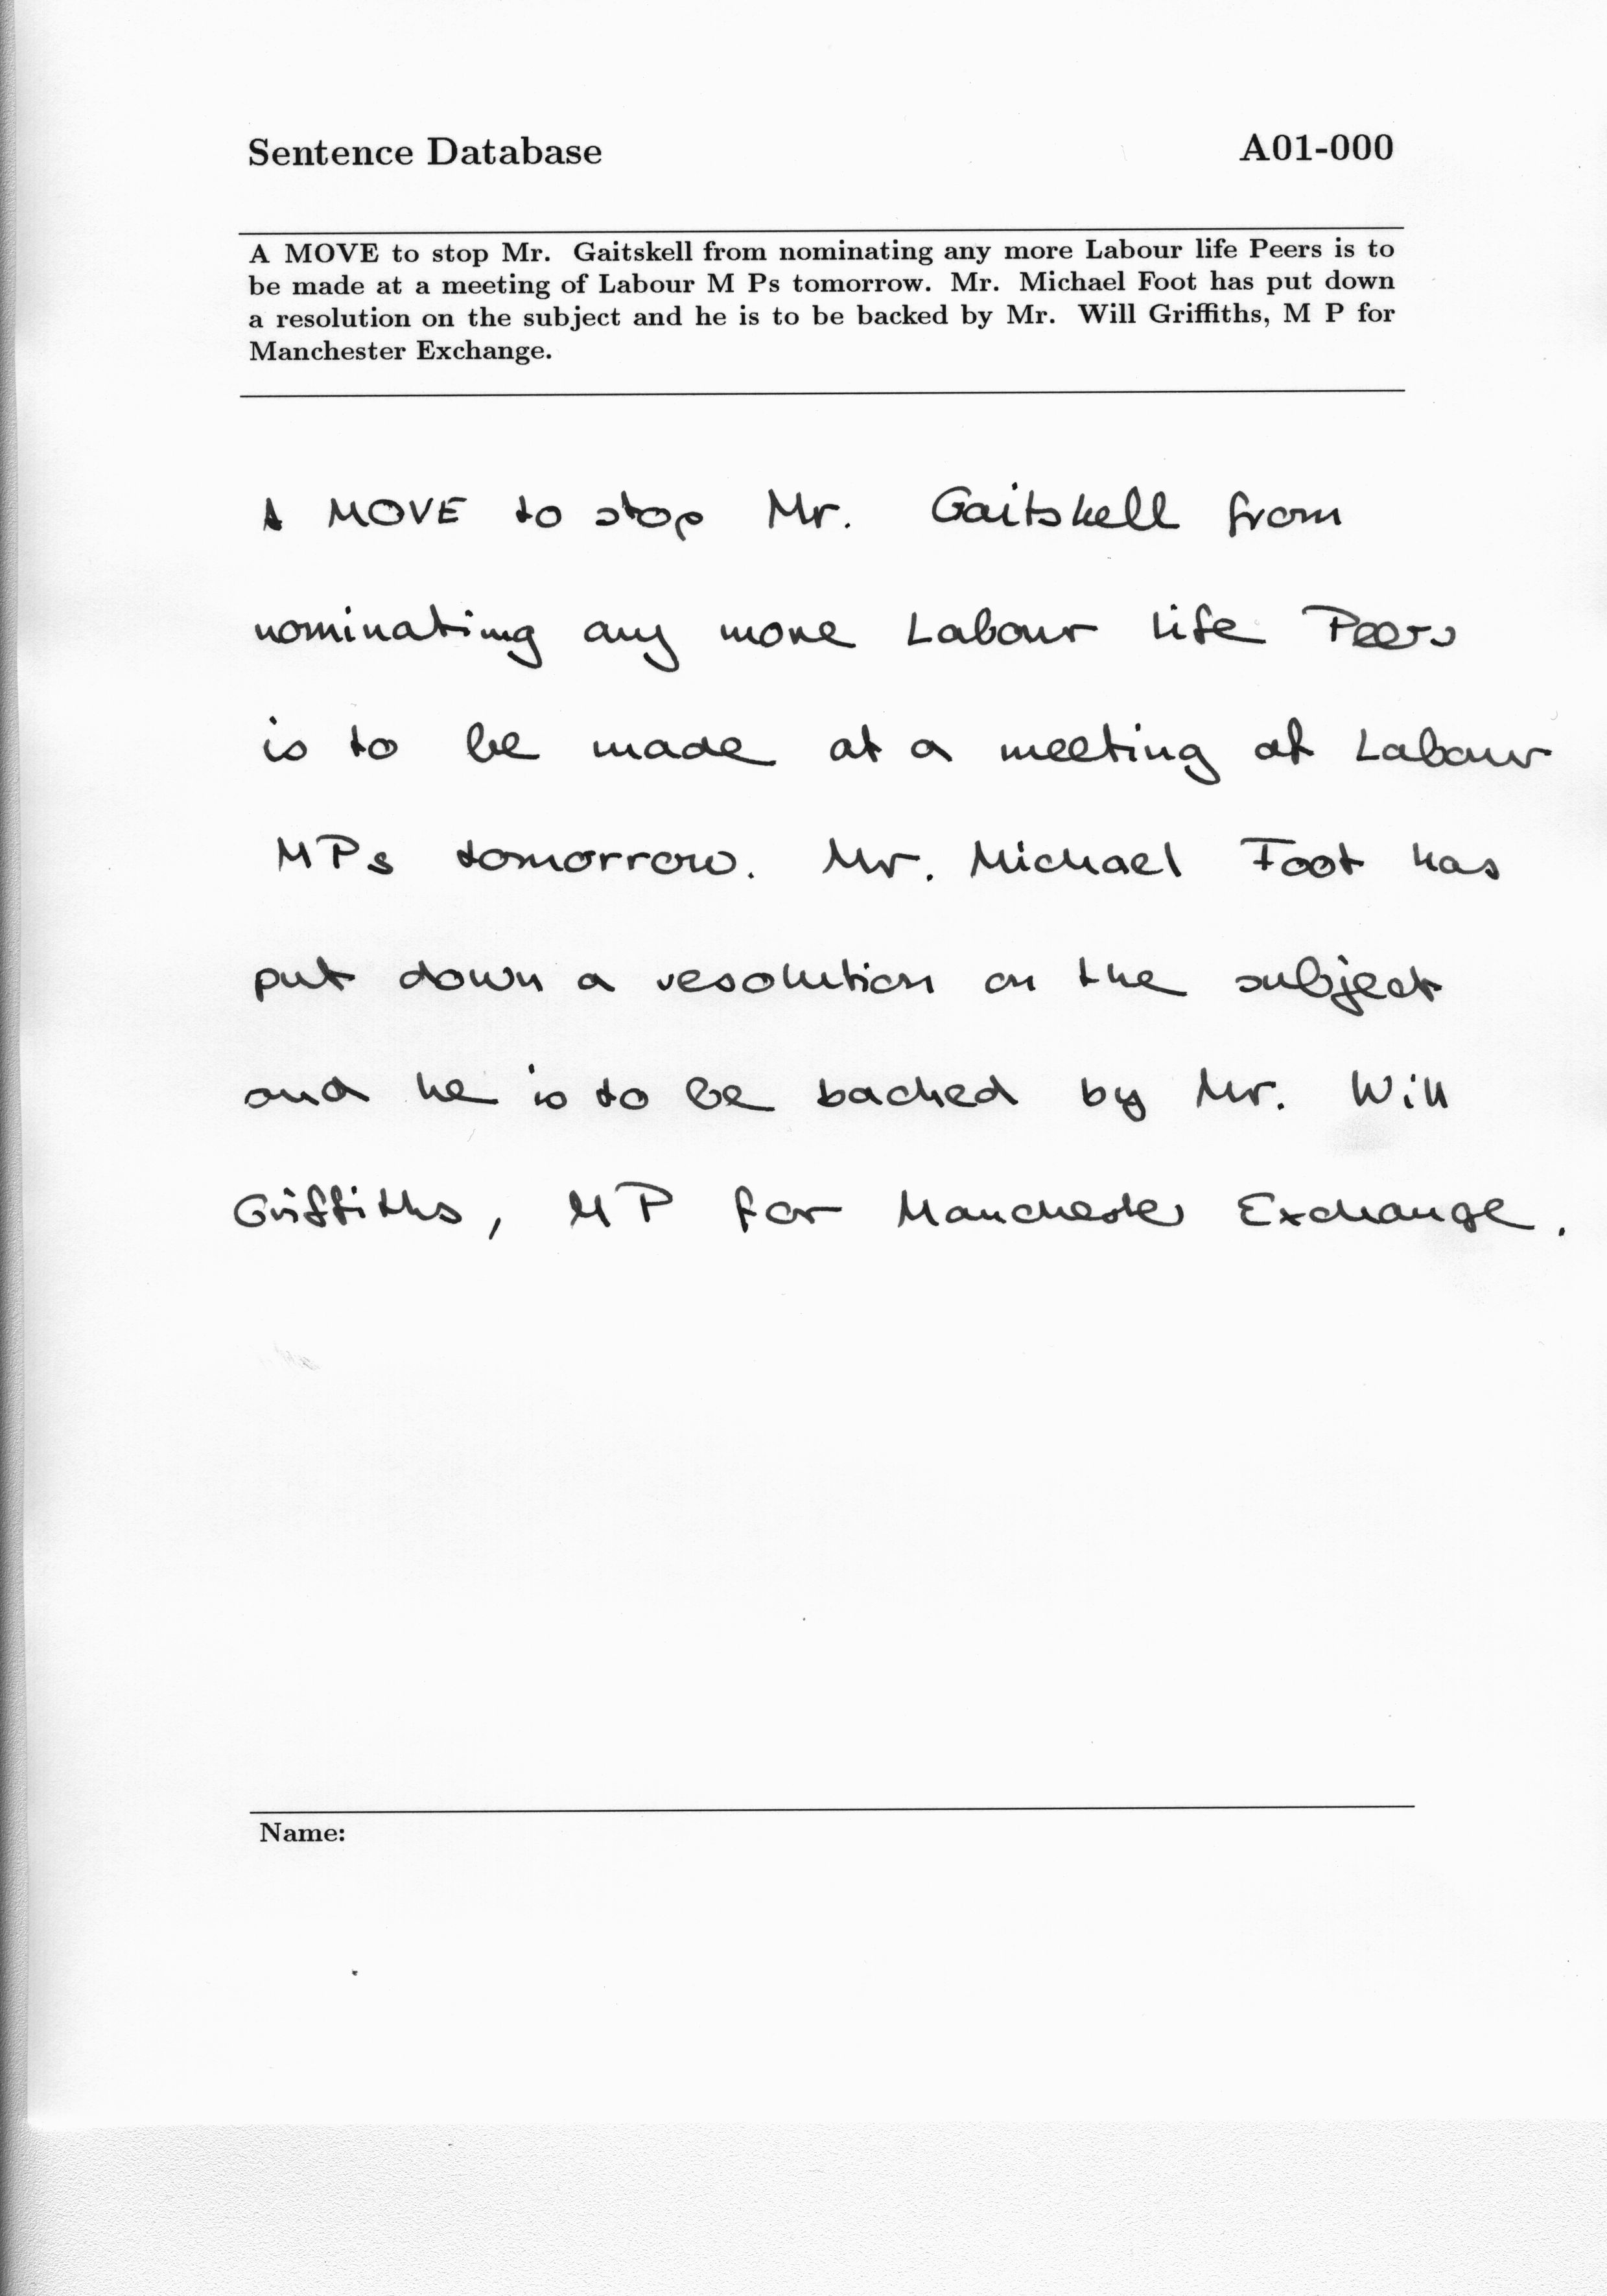

In [5]:
Image.open(PATH/'forms/a01-000u.png')

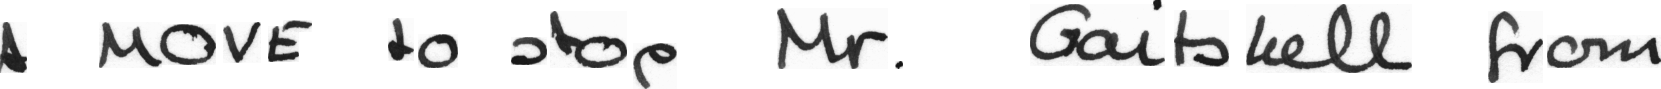

In [6]:
Image.open(PATH/'sentences/a01/a01-000u/a01-000u-s00-00.png')

In [18]:
fnames = ['a01-132.png','a05-104.png','b05-017.png','c03-084f.png','d04-066.png','e04-091.png','f07-019b.png','g06-011k.png','g06-045m.png','h04-035.png','k01-051.png','l04-087.png','m04-152.png','n06-123.png','r03-065.png',
'a01-132u.png','a05-108.png','b05-032.png','c03-087a.png','d04-071.png','e04-095.png','f07-021a.png','g06-011l.png','g06-045n.png','h04-049.png','k02-018.png','l04-093.png','m04-164.png','n06-128.png','r03-084.png',
'a01-132x.png','a05-113.png','b05-038.png','c03-087b.png','d04-075.png','e04-099.png','f07-021b.png','g06-011m.png','g06-045o.png','h04-052.png','k02-023.png','l04-098.png','m04-180.png','n06-133.png','r03-090.png',
'a02-000.png','a05-116.png','b05-042.png','c03-087c.png','d04-081.png','e04-103.png','f07-024a.png','g06-011n.png','g06-045p.png','h04-055.png','k02-029.png','l04-102.png','m04-190.png','n06-140.png','r03-096.png',
'a02-004.png','a05-121.png','b05-045.png','c03-087d.png','d04-086.png','e04-109.png','f07-024b.png','g06-011o.png','g06-045r.png','h04-057.png','k02-036.png','l04-106.png','m04-200.png','n06-148.png','r03-110.png',
'a02-008.png','a05-125.png','b05-050.png','c03-087e.png','d04-089.png','e04-114.png','f07-028a.png','g06-011p.png','g06-047a.png','h04-061.png','k02-053.png','l04-113.png','m04-209.png','n06-156.png','r03-115.png',
'a02-012.png','a06-000.png','b05-055.png','c03-087f.png','d04-096.png','e04-119.png','f07-028b.png','g06-011r.png','g06-047b.png','h04-071.png','k02-062.png','l04-118.png','m04-216.png','n06-163.png','r06-000.png',
'a02-017.png','a06-004.png','b05-058.png','c03-094a.png','d04-101.png','e04-124.png','f07-032a.png','g06-018a.png','g06-047c.png','h04-074.png','k02-067.png','l04-124.png','m04-222.png','n06-169.png','r06-003.png',
'a02-020.png','a06-008.png','b05-062.png','c03-094b.png','d04-111.png','e04-127.png','f07-032b.png','g06-018b.png','g06-047d.png','h04-078.png','k02-076.png','l04-130.png','m04-231.png','n06-175.png','r06-007.png',
'a02-024.png','a06-014.png','b05-067.png','c03-094c.png','d04-117.png','e04-132.png','f07-036.png','g06-018c.png','g06-047e.png','h04-082.png','k02-093.png','l04-136.png','m04-238.png','n06-182.png','r06-011.png',
'a02-027.png','a06-020.png','b05-071.png','c03-094d.png','d04-121.png','e06-000.png','f07-039a.png','g06-018d.png','g06-047f.png','h05-012.png','k02-097.png','l04-141.png','m04-246.png','n06-186.png','r06-018.png',
'a02-032.png','a06-025.png','b05-074.png','c03-094e.png','d04-125.png','e06-003.png','f07-039b.png','g06-018e.png','g06-047g.png','h06-000.png','k02-102.png','l04-147.png','m04-251.png','n06-194.png','r06-022.png',
'a02-037.png','a06-036.png','b05-079.png','c03-094f.png','d04-131.png','e06-006.png','f07-042a.png','g06-018f.png','g06-047h.png','h06-003.png','k02-112.png','l04-153.png','m06-019.png','n06-201.png','r06-027.png',
'a02-042.png','a06-039.png','b05-083.png','c03-096a.png','d05-008.png','e06-010.png','f07-042b.png','g06-018g.png','g06-047i.png','h06-079.png','k02-117.png','l04-159.png','m06-031.png','p01-147.png','r06-035.png',
'a02-046.png','a06-044.png','b05-088.png','c03-096b.png','d05-013.png','e06-015.png','f07-046a.png','g06-018h.png','g06-047j.png','h06-082.png','k03-117.png','l04-163.png','m06-042.png','p01-155.png','r06-041.png',
'a02-050.png','a06-051.png','b05-098.png','c03-096c.png','d05-021.png','e06-021.png','f07-046b.png','g06-018i.png','g06-047k.png','h06-085.png','k03-138.png','l04-170.png','m06-048.png','p01-168.png','r06-044.png',
'a02-053.png','a06-057.png','b06-000.png','c03-096d.png','d05-025.png','e06-026.png','f07-069.png','g06-018j.png','g06-047l.png','h06-089.png','k03-144.png','l04-174.png','m06-056.png','p01-174.png','r06-049.png',
'a02-057.png','a06-064.png','b06-004.png','c03-096e.png','d05-030.png','e06-030.png','f07-073.png','g06-018k.png','g06-047m.png','h06-092.png','k03-152.png','l04-179.png','m06-067.png','p02-000.png','r06-053.png',
'a02-062.png','a06-070.png','b06-008.png','c03-096f.png','d05-040.png','e06-033.png','f07-076a.png','g06-018l.png','g06-047n.png','h06-096.png','k03-157.png','l07-052.png','m06-076.png','p02-008.png','r06-057.png',
'a02-067.png','a06-075.png','b06-012.png','c04-000.png','d06-000.png','e06-037.png','f07-081a.png','g06-018m.png','g06-047o.png','h07-000.png','k03-164.png','l07-065.png','m06-083.png','p02-017.png','r06-062.png',
'a02-072.png','a06-090.png','b06-015.png','c04-004.png','d06-003.png','e06-041.png','f07-081b.png','g06-018n.png','g06-047p.png','h07-003.png','k03-180.png','l07-074.png','m06-091.png','p02-022.png','r06-066.png',
'a02-078.png','a06-095.png','b06-019.png','c04-008.png','d06-008.png','e06-046.png','f07-084a.png','g06-018o.png','g06-047r.png','h07-007.png','k04-000.png','l07-080.png','m06-098.png','p02-027.png','r06-070.png',
'a02-082.png','a06-100.png','b06-023.png','c04-013.png','d06-011.png','e06-049.png','f07-084b.png','g06-018p.png','g06-050a.png','h07-011.png','k04-005.png','l07-085.png','m06-106.png','p02-069.png','r06-076.png',
'a02-086.png','a06-110.png','b06-027.png','c04-017.png','d06-015.png','e06-053.png','f07-088a.png','g06-018r.png','g06-050b.png','h07-013.png','k04-010.png','l07-103.png','n01-000.png','p02-076.png','r06-090.png',
'a02-090.png','a06-114.png','b06-032.png','c04-023.png','d06-020.png','e06-070.png','f07-088b.png','g06-026a.png','g06-050c.png','h07-017.png','k04-014.png','l07-111.png','n01-004.png','p02-081.png','r06-097.png',
'a02-093.png','a06-119.png','b06-036.png','c04-028.png','d06-025.png','e07-000.png','f07-092a.png','g06-026b.png','g06-050d.png','h07-020.png','k04-017.png','l07-118.png','n01-009.png','p02-090.png','r06-103.png',
'a02-098.png','a06-124.png','b06-042.png','c04-035.png','d06-027.png','e07-003.png','f07-092b.png','g06-026c.png','g06-050e.png','h07-023.png','k04-022.png','l07-131.png','n01-020.png','p02-101.png','r06-106.png',
'a02-102.png','a06-128.png','b06-045.png','c04-039.png','d06-030.png','e07-007.png','f07-096.png','g06-026d.png','g06-050f.png','h07-025.png','k04-028.png','l07-135.png','n01-031.png','p02-105.png','r06-111.png',
'a02-106.png','a06-134.png','b06-049.png','c04-044.png','d06-037.png','e07-012.png','f07-101a.png','g06-026e.png','g06-050g.png','h07-025a.png','k04-033.png','l07-138.png','n01-036.png','p02-109.png','r06-115.png',
'a02-111.png','a06-141.png','b06-053.png','c04-050.png','d06-041.png','e07-061.png','f07-101b.png','g06-026f.png','g06-050h.png','h07-028.png','k04-039.png','l07-172.png','n01-045.png','p02-115.png','r06-121.png',
'a02-116.png','a06-147.png','b06-056.png','c04-056.png','d06-046.png','e07-066.png','g01-000.png','g06-026g.png','g06-050i.png','h07-028a.png','k04-050.png','l07-176.png','n01-052.png','p02-121.png','r06-126.png',
'a02-120.png','a06-152.png','b06-059.png','c04-061.png','d06-050.png','e07-072.png','g01-004.png','g06-026h.png','g06-050j.png','h07-030.png','k04-054.png','l07-181.png','n01-057.png','p02-127.png','r06-130.png',
'a02-124.png','a06-157.png','b06-064.png','c04-066.png','d06-056.png','e07-076.png','g01-008.png','g06-026i.png','g06-050k.png','h07-030a.png','k04-057.png','l07-187.png','n02-000.png','p02-131.png','r06-137.png',
'a03-006.png','b01-000.png','b06-068.png','c04-075.png','d06-060.png','e07-079.png','g01-012.png','g06-026j.png','g06-050l.png','h07-033.png','k04-061.png','l07-190.png','n02-004.png','p02-135.png','r06-143.png',
'a03-009.png','b01-004.png','b06-071.png','c04-080.png','d06-063.png','e07-083.png','g01-016.png','g06-026k.png','g06-050m.png','h07-033a.png','k04-064.png','m01-000.png','n02-009.png','p02-139.png',
'a03-011.png','b01-009.png','b06-075.png','c04-089.png','d06-067.png','e07-086.png','g01-019.png','g06-026l.png','g06-050n.png','h07-037.png','k04-068.png','m01-012.png','n02-016.png','p02-144.png',
'a03-014.png','b01-014.png','b06-079.png','c04-098.png','d06-072.png','e07-090.png','g01-022.png','g06-026m.png','g06-050o.png','h07-037a.png','k04-075.png','m01-017.png','n02-028.png','p02-150.png',
'a03-017.png','b01-018.png','b06-082.png','c04-105.png','d06-076.png','e07-094.png','g01-025.png','g06-026n.png','g06-050p.png','h07-040.png','k04-079.png','m01-022.png','n02-033.png','p02-155.png',
'a03-020.png','b01-023.png','b06-087.png','c04-110.png','d06-082.png','e07-098.png','g01-027.png','g06-026o.png','g06-050r.png','h07-040b.png','k04-085.png','m01-026.png','n02-037.png','p03-004.png',
'a03-023.png','b01-027.png','b06-090.png','c04-116.png','d06-086.png','e07-101.png','g01-031.png','g06-026p.png','g06-089.png','h07-044a.png','k04-093.png','m01-032.png','n02-040.png','p03-009.png']

In [25]:
def show_rand_form():
    r = random.randint(0, len(fnames))
    fname = fnames[r]
    im = Image.open(PATH/'forms'/fname)
    print(fname)
    print(im.size)
    return im

g01-000.png
(2479, 3542)


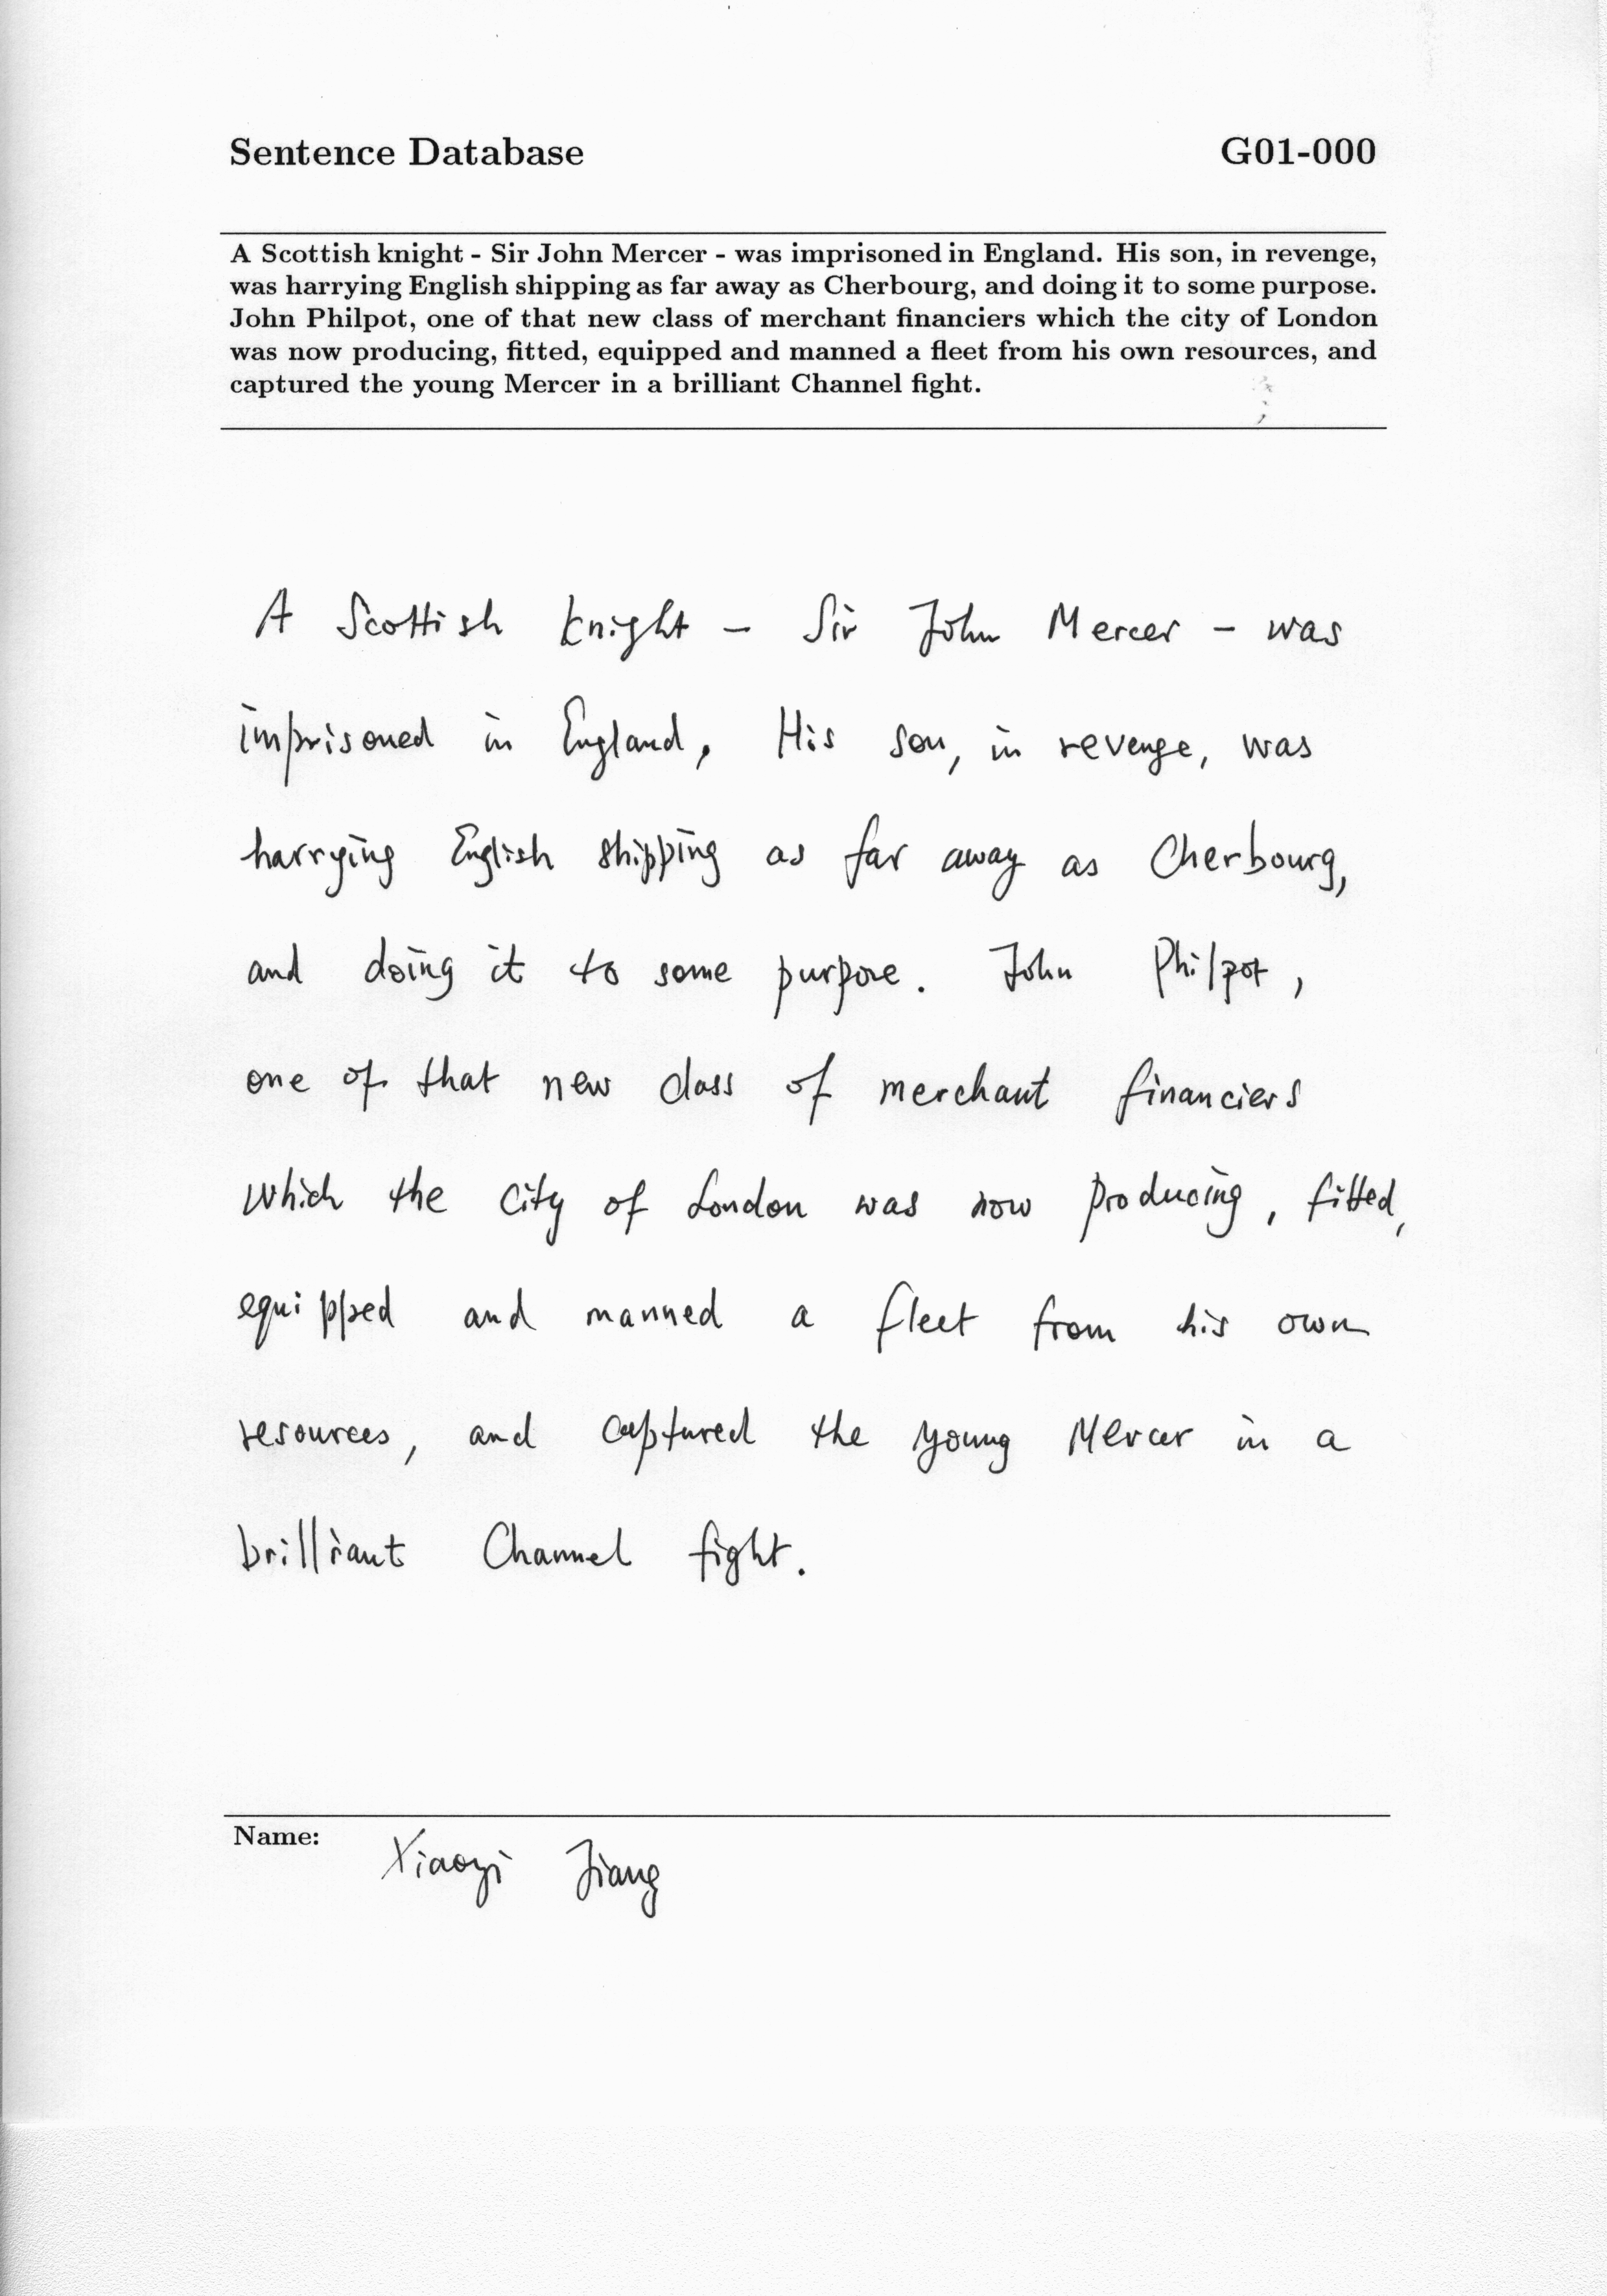

In [26]:
show_rand_form()

# LSTM cell

A long short-term memory (LSTM) cell.

\begin{array}{ll}
i = \sigma(W_{ii} x + b_{ii} + W_{hi} h + b_{hi}) \\
f = \sigma(W_{if} x + b_{if} + W_{hf} h + b_{hf}) \\
g = \tanh(W_{ig} x + b_{ig} + W_{hg} h + b_{hg}) \\
o = \sigma(W_{io} x + b_{io} + W_{ho} h + b_{ho}) \\
c' = f * c + i * g \\
h' = o \tanh(c') \\
\end{array}

where $\sigma$ is the sigmoid function.

Args:
- input_size: The number of expected features in the input `x`
- hidden_size: The number of features in the hidden state `h`
- bias: If `False`, then the layer does not use bias weights $b_ih$ and
    $b_hh$. Default: ``True``

Inputs: $input, (h_0, c_0)$
- **$input$** of shape `(batch, input_size)`: tensor containing input features  
- **$h_0$** of shape `(batch, hidden_size)`: tensor containing the initial hidden
  state for each element in the batch.
- **$c_0$** of shape `(batch, hidden_size)`: tensor containing the initial cell state
  for each element in the batch.

  If $(h_0, c_0)$ is not provided, both **$h_0$** and **$c_0$** default to zero.

Outputs: $h_1, c_1$
- **$h_1$** of shape `(batch, hidden_size)`: tensor containing the next hidden state
  for each element in the batch
- **$c_1$** of shape `(batch, hidden_size)`: tensor containing the next cell state
  for each element in the batch

Attributes:
- $weight_ih$: the learnable input-hidden weights, of shape `(4*hidden_size x input_size)`
- $weight_hh$: the learnable hidden-hidden weights, of shape `(4*hidden_size x hidden_size)`
- $bias_ih$: the learnable input-hidden bias, of shape `(4*hidden_size)`
- $bias_hh$: the learnable hidden-hidden bias, of shape `(4*hidden_size)`

Examples::

    >>> rnn = nn.LSTMCell(10, 20)
    >>> input = torch.randn(6, 3, 10)
    >>> hx = torch.randn(3, 20)
    >>> cx = torch.randn(3, 20)
    >>> output = []
    >>> for i in range(6):
            hx, cx = rnn(input[i], (hx, cx))
            output.append(hx)

In [ ]:
class LSTMCell(RNNCellBase):
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.weight_ih = Parameter(torch.Tensor(4 * hidden_size, input_size))
        self.weight_hh = Parameter(torch.Tensor(4 * hidden_size, hidden_size))
        if bias:
            self.bias_ih = Parameter(torch.Tensor(4 * hidden_size))
            self.bias_hh = Parameter(torch.Tensor(4 * hidden_size))
        else:
            self.register_parameter('bias_ih', None)
            self.register_parameter('bias_hh', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def forward(self, input, hx=None):
        self.check_forward_input(input)
        if hx is None:
            hx = input.new_zeros(input.size(0), self.hidden_size, requires_grad=False)
            hx = (hx, hx)
        self.check_forward_hidden(input, hx[0], '[0]')
        self.check_forward_hidden(input, hx[1], '[1]')
        return self._backend.LSTMCell(
            input, hx,
            self.weight_ih, self.weight_hh,
            self.bias_ih, self.bias_hh,
        )

# MDLSTM Cell

$( h_{i,j} , c_{i,j} ) = LSTM( x_{i,j} , h_{i,j±1} , h_{i±1,j} , c_{i,j±1} , c_{i±1,j} ) $